In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Pobierz najnowszą wersję zbioru danych
path = kagglehub.dataset_download("alexandrepetit881234/fake-bills")

In [3]:
# Wczytaj dane do ramki danych (DataFrame) przy użyciu pandas
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), header = 0, delimiter = ";")

# Wyświetl ramkę danych
display(df)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
# Wyświetl podstawowe statystyki opisowe dla danych
display(df.describe())

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [5]:
# Sprawdź, czy w zbiorze danych występują wartości NaN (brakujące dane)
print(df.isna().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [6]:
# Wyświetl wiersze, w których występują brakujące dane w kolumnie "margin_low"
display(df[df["margin_low"].isna() == True])

# Oblicz średnią wartość dla kolumny "margin_low"
mean_value = df["margin_low"].mean()

# Wypełnij brakujące wartości w kolumnie "margin_low" średnią wartością
df["margin_low"] = df["margin_low"].fillna(mean_value)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [7]:
# Zakoduj kolumnę docelową "is_genuine" jako zmienną binarną
df['is_genuine'] = df['is_genuine'].astype(int)

# Zdefiniuj cechy (X) i zmienną docelową (y)
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = df['is_genuine']

# Podziel dane na zbiór treningowy i testowy (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Zainicjuj i wytrenuj model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewiduj prawdopodobieństwa dla zbioru testowego
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Przewiduj klasy dla zbioru testowego
y_pred = model.predict(X_test)

# Ocena modelu – dokładność
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność:", accuracy)

# Wyświetl raport klasyfikacji (Precision, Recall, F1-score)
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

# Wyświetl macierz pomyłek (Confusion Matrix)
print("\nMacierz pomyłek:\n", confusion_matrix(y_test, y_pred))

Dokładność: 0.99

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Macierz pomyłek:
 [[107   3]
 [  0 190]]


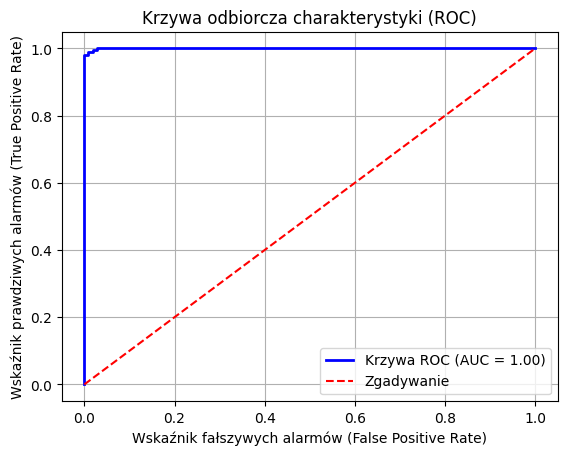

In [8]:
# Oblicz krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Rysuj krzywą ROC
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', label = 'Zgadywanie')  # Linia diagonalna
plt.xlabel('Wskaźnik fałszywych alarmów (False Positive Rate)')
plt.ylabel('Wskaźnik prawdziwych alarmów (True Positive Rate)')
plt.title('Krzywa odbiorcza charakterystyki (ROC)')
plt.legend(loc = "lower right")
plt.grid()
plt.show()

Regresja logistyczna:
Dokładność (Regresja logistyczna): 0.99

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Macierz pomyłek:
 [[107   3]
 [  0 190]]

Algorytm K-Nearest Neighbors (KNN):
Dokładność (KNN, k=5): 0.99

Raport klasyfikacji (KNN):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300


Macierz pomyłek (KNN):
 [[106   4]
 [  0 190]]


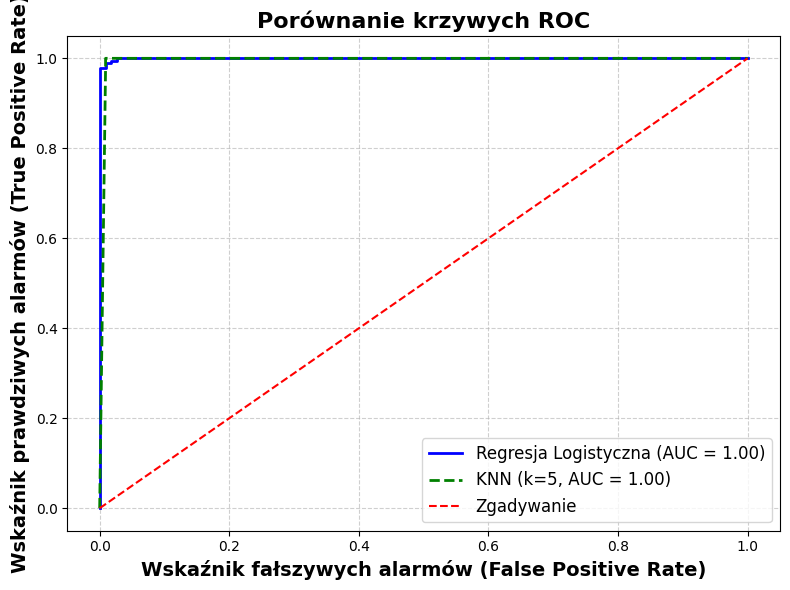

In [13]:
# Import wymaganych bibliotek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Dane wejściowe: X (cechy) i y (zmienna docelowa) już zdefiniowane wcześniej

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresja logistyczna ###
print("Regresja logistyczna:")
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predykcja dla zbioru testowego (Regresja logistyczna)
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# Ocena modelu (Regresja logistyczna)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Dokładność (Regresja logistyczna): {accuracy_lr:.2f}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred_lr))
print("\nMacierz pomyłek:\n", confusion_matrix(y_test, y_pred_lr))

# Krzywa ROC (Regresja logistyczna)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

### K-Nearest Neighbors (KNN) ###
print("\nAlgorytm K-Nearest Neighbors (KNN):")

# Inicjalizacja modelu KNN (k = 5)
k = 5
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train, y_train)

# Predykcja dla zbioru testowego (KNN)
y_pred_knn = model_knn.predict(X_test)
y_pred_proba_knn = model_knn.predict_proba(X_test)[:, 1]

# Ocena modelu (KNN)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Dokładność (KNN, k={k}): {accuracy_knn:.2f}")
print("\nRaport klasyfikacji (KNN):\n", classification_report(y_test, y_pred_knn))
print("\nMacierz pomyłek (KNN):\n", confusion_matrix(y_test, y_pred_knn))

# Krzywa ROC (KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

### Wizualizacja krzywych ROC dla obu modeli ###
plt.figure(figsize=(8, 6))

# Regresja logistyczna
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Regresja Logistyczna (AUC = {roc_auc_lr:.2f})')

# KNN
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, linestyle='--', label=f'KNN (k={k}, AUC = {roc_auc_knn:.2f})')

# Linia zgadywania
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Zgadywanie')

# Dostosowanie wykresu
plt.xlabel('Wskaźnik fałszywych alarmów (False Positive Rate)', fontsize=14, fontweight='bold')
plt.ylabel('Wskaźnik prawdziwych alarmów (True Positive Rate)', fontsize=14, fontweight='bold')
plt.title('Porównanie krzywych ROC', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()